# Does school funding impact students academic performance?

<img src="images/education-header.jpg" width="900" />



**Credit:**  [techxend](https://www.techxtend.com/site/content/education/) 

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy.stats as st

#sns.set_theme(style="ticks", color_codes=True)


warnings.filterwarnings("ignore")  # Suppress all warnings

In [2]:
# read file
df = pd.read_csv('schools_final_economic_merged.csv', index_col = 0)
df

School Name        District Name  District Code_x  \
67     A. E. ARNOLD ELEMENTARY   CYPRESS ELEMENTARY         610440.0   
66     A. E. ARNOLD ELEMENTARY   CYPRESS ELEMENTARY         610440.0   
68     A. E. ARNOLD ELEMENTARY   CYPRESS ELEMENTARY         610440.0   
69     A. E. ARNOLD ELEMENTARY   CYPRESS ELEMENTARY         610440.0   
5359   A. E. ARNOLD ELEMENTARY   CYPRESS ELEMENTARY         610440.0   
...                        ...                  ...              ...   
24518   ZEPHYR LANE ELEMENTARY   FAIRFAX ELEMENTARY         613290.0   
32989          ZOE BARNUM HIGH  EUREKA CITY SCHOOLS         600052.0   
32990          ZOE BARNUM HIGH  EUREKA CITY SCHOOLS         600052.0   
19887             ZUPANIC HIGH       RIALTO UNIFIED         632370.0   
19888             ZUPANIC HIGH       RIALTO UNIFIED         632370.0   

       Total Enrollment  Full-Time Equivalent (FTE) Teachers  \
67                756.0                                28.00   
66                756.0                                28.00   
68                756.0                                28.00   
69                756.0                                28.00   
5359              756.0                                28.00   
...                 ...                                  ...   
24518             719.0                                29.00   
32989              67.0                                 3.73   
32990              67.0                                 3.73   
19887             112.0                                 4.00   
19888             112.0                                 4.00   

       Pupil/Teacher Ratio  Total Revenue (TOTALREV) per Pupil   \
67                   27.00                              11980.0   
66                   27.00                              11980.0   
68                   27.00                              11980.0   
69                   27.00                              11980.0   
5359                 27.00                              11980.0   
...                    ...                                  ...   
24518                24.79                              13045.0   
32989                17.96                              13819.0   
32990                17.96                              13819.0   
19887                28.00                              13681.0   
19888                28.00                              13681.0   

       Total Revenue - Local Sources (TLOCREV) per Pupil   \
67                                                6149.0    
66                                                6149.0    
68                                                6149.0    
69                                                6149.0    
5359                                              6149.0    
...                                                  ...    
24518                                             2139.0    
32989                                             5722.0    
32990                                             5722.0    
19887                                             1968.0    
19888                                             1968.0    

       Total Revenue - State Sources (TSTREV) per Pupil  \
67                                               5210.0   
66                                               5210.0   
68                                               5210.0   
69                                               5210.0   
5359                                             5210.0   
...                                                 ...   
24518                                            9581.0   
32989                                            6729.0   
32990                                            6729.0   
19887                                           10466.0   
19888                                           10466.0   

       Total Revenue - Federal Sources (TFEDREV) per Pupil   ...  \
67                                                 622.0     ...   
66

In [3]:
# columns present on the dataset
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

In [4]:
#Converting all the assessment columns back to  percentage columns for exceeded, nearly met, not met to show completion results as percentage of test taken
df['Percentate Std Exceed'] =(df['Total Standard Exceeded']/df['Students Tested']*100).round(decimals=0)
df['Percentage Std Met'] =(100*df['Total Standard Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Nearly Met'] =(100*df['Total Standard Nearly Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Not Met'] =(100*df['Total Standard Not Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Met and Above'] =(100*df['Total Standard Met and Above']/df['Students Tested']).round(decimals=0)
#Percentage was multiplied by the students tested information and not the total enrollment information.
#Students tested in Math and Literacy can be the same students or different students, we don't have that information.
#we are adding the results of both exams, this can cause a duplicate in value of students tested, I will separate both datasets

In [5]:
df['Pass'] = df['Percentate Std Exceed'] + df['Percentage Std Met']
df['Fail'] = df['Percentage Std Nearly Met'] + df['Percentage Std Not Met']

In [6]:
# columns present on the dataset
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

In [7]:
# checking unique ethinicities present in subgroup ID 
df['Subgroup ID'].unique()

array(['Asian or Asian/Pacific Islander', 'Hispanic', 'White',
       'Two or More Races', 'Black', 'Hawaiian Nat./Pacific Isl.',
       'American Indian/Alaska Native'], dtype=object)

In [8]:
# filtering based on total enrollment
df = df[df['Total Enrollment'] != 0]
#df = df[df['Total Enrollment'] > 250]

# need to filter out the 6 schools that have more students tested than enrolled

In [9]:
# checking total enrollment data
# we see that there's a wide number of students per district. 
# the smallest district has 251 students and the largest over 630,000 students
df.describe().T

count          mean  \
District Code_x                                     43434.0  6.224972e+05   
Total Enrollment                                    43434.0  9.055675e+02   
Full-Time Equivalent (FTE) Teachers                 43434.0  3.772271e+01   
Pupil/Teacher Ratio                                 43434.0  2.385651e+01   
Total Revenue (TOTALREV) per Pupil                  43434.0  1.382193e+04   
Total Revenue - Local Sources (TLOCREV) per Pupil   43434.0  5.096504e+03   
Total Revenue - State Sources (TSTREV) per Pupil    43434.0  7.645860e+03   
Total Revenue - Federal Sources (TFEDREV) per P...  43434.0  1.079509e+03   
Total Current Expenditures - Instruction (TCURI...  43434.0  6.957278e+03   
Total Current Expenditures - Support Services (...  43434.0  4.105645e+03   
Total Current Expenditures - Other El-Sec Progr...  43434.0  4.398174e+02   
Total Current Expenditures - Salary (Z32) per P...  43434.0  6.635720e+03   
Total Current Expenditures - Benefits (Z34) per...  43434.0  2.969504e+03   
Total Expenditures (TOTALEXP) per Pupil             43434.0  1.366581e+04   
Total Expenditures - Capital Outlay (TCAPOUT) p...  43434.0  1.178769e+03   
Total Current Expenditures - Non El-Sec Program...  43434.0  1.683692e+02   
Total Current Expenditures (TCURELSC) per Pupil     43434.0  1.150279e+04   
Instructional Expenditures (E13) per Pupil          43434.0  6.957278e+03   
Count Enrollment per ethnicity                      43434.0  3.510695e+02   
County Code                                         43434.0  2.888272e+01   
District Code_y                                     43434.0  6.740646e+04   
School Code                                         43434.0  4.690413e+06   
Test Id                                             43434.0  1.500391e+00   
Mean Scale Score                                    43434.0  2.513888e+03   
Total Tested At Entity Level                        43434.0  3.308118e+02   
Total Tested with Scores                            43434.0  3.305813e+02   
CAASPP Reported Enrollment                          43434.0  1.057144e+02   
Students Tested                                     43434.0  1.035579e+02   
Students with Scores                                43434.0  1.034815e+02   
Total Standard Exceeded                             43434.0  1.936927e+01   
Total Standard Met                                  43434.0  2.462110e+01   
Total Standard Met and Above                        43434.0  4.399889e+01   
Total Standard Nearly Met                           43434.0  2.558240e+01   
Total Standard Not Met                              43434.0  3.395904e+01   
Zip Code                                            43434.0  9.326951e+04   
Percentate Std Exceed                               43434.0  2.053509e+01   
Percentage Std Met                                  43434.0  2.482210e+01   
Percentage Std Nearly Met                           43434.0  2.416906e+01   
Percentage Std Not Met                              43434.0  3.040466e+01   
Percentage Std Met and Above                        43434.0  4.538590e+01   
Pass                                                43434.0  4.535719e+01   
Fail                                                43434.0  5.457372e+01   

                                                             std       min  \
District Code_x                                     1.513820e+04  600006.0   
Total Enrollment                                    6.467631e+02      11.0   
Full-Time Equivalent (FTE) Teachers                 2.647622e+01       0.0   
Pupil/Teacher Ratio                                 4.709478e+00       0.0   
Total Revenue (TOTALREV) per Pupil                  7.006578e+03       0.0   
Total Revenue - Local Sources (TLOCREV) per Pupil   4.027885e+03       0.0   
Total Revenue - State Sources (TSTREV) per Pupil    3.870277e+03       0.0   
Total Revenue - Federal Sources (TFEDREV) per P...  1.743395e+03       0.0   
Total Current Expenditures - Instruction

In [10]:
df['Mean Scale Score'].describe()

count    43434.000000
mean      2513.888352
std         77.438328
min       2295.200000
25%       2453.400000
50%       2508.350000
75%       2565.333333
max       2815.600000
Name: Mean Scale Score, dtype: float64

In [11]:
# checking revenue per student data
# we see that the average capiutal per student is around 9640
# the minimum is 0 and the max capital per student is over 77000 clearly an outlier - we need to fix these
df['Total Revenue (TOTALREV) per Pupil '].describe()

count     43434.000000
mean      13821.928259
std        7006.578298
min           0.000000
25%       12151.000000
50%       13227.000000
75%       14345.000000
max      369640.000000
Name: Total Revenue (TOTALREV) per Pupil , dtype: float64

In [12]:
# dataset containing school districts with over $20,000 revenue per student
df_high_funding = df[(df['Total Revenue (TOTALREV) per Pupil '] > 20_000)]

# update the main dataset to not include schools with over 20k revenue per student nor zero revenue per student
df = df[(df['Total Revenue (TOTALREV) per Pupil '] < 20_000)]
df = df[(df['Total Revenue (TOTALREV) per Pupil '] != 0)]

print(df_high_funding.shape)


(1093, 46)


In [13]:
df_high_funding['District Name'].unique()

array(['ORANGE COUNTY DEPARTMENT OF EDUCATION', 'PALO ALTO UNIFIED',
       'SANTA CLARA UNIFIED', 'EMERY UNIFIED', 'JEFFERSON ELEMENTARY',
       'SAN MATEO UNION HIGH', 'MOUNT PLEASANT ELEMENTARY',
       'VAL VERDE UNIFIED', 'BAKER VALLEY UNIFIED', 'BAYSHORE ELEMENTARY',
       'BEVERLY HILLS UNIFIED', 'LAWNDALE ELEMENTARY', 'TAFT UNION HIGH',
       'COAST UNIFIED', 'CARMEL UNIFIED', 'SEQUOIA UNION HIGH',
       'LOS ANGELES COUNTY OFFICE OF EDUCATION',
       'EL DORADO COUNTY OFFICE OF EDUCATION', 'COLD SPRING ELEMENTARY',
       'RIVERSIDE COUNTY OFFICE OF EDUCATION',
       'PORTOLA VALLEY ELEMENTARY', 'HILLSBOROUGH CITY ELEMENTARY',
       'BYRON UNION ELEMENTARY', 'LAGUNA BEACH UNIFIED',
       'SACRAMENTO COUNTY OFFICE OF EDUCATION',
       'VENTURA COUNTY OFFICE OF EDUCATION',
       'STANISLAUS COUNTY OFFICE OF EDUCATION', 'JULIAN UNION HIGH',
       'JUNCTION ELEMENTARY', 'KENWOOD',
       'KERN COUNTY OFFICE OF EDUCATION', 'LAS LOMITAS ELEMENTARY',
       'TULARE COUNTY 

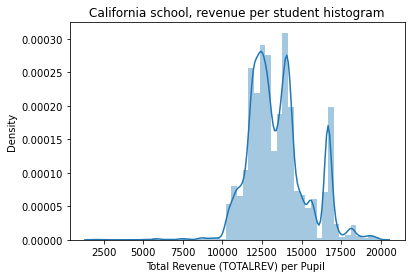

In [14]:
plt.figure(figsize=(6,4))
sns.distplot(df['Total Revenue (TOTALREV) per Pupil '])
plt.title('California school, revenue per student histogram')
plt.show()

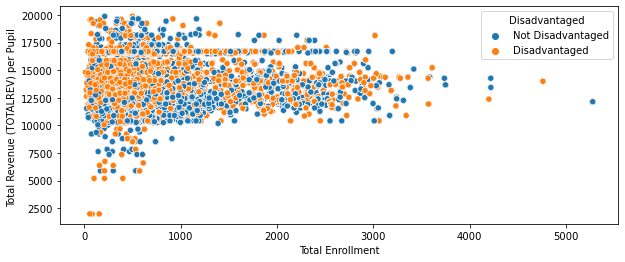

In [15]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Total Enrollment', y='Total Revenue (TOTALREV) per Pupil ', hue='Disadvantaged',data=df)
plt.show()

In [16]:
#Correlaiton of revenue sources Vs Scores and Pass Fail
corr_columns = ['School Name', 'District Name', 'District Code_x',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [17]:
#Correlation of expenditures with scores
corr_columns = ['School Name', 'District Name', 'District Code_x','Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
                'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [18]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.4f} + {:.4f}x'.format(a, b))

    return a, b

best fit line:
y = 2544.4917 + -0.0023x


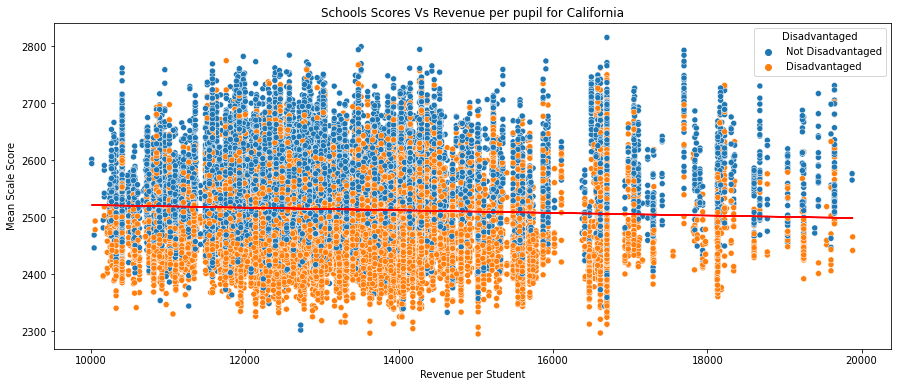

In [19]:
df_revenue=df[df['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'],hue=df_revenue['Disadvantaged'])
yfit = [a + b * xi for xi in df_revenue['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_revenue['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Scores Vs Revenue per pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2544.4917 + -0.0023x


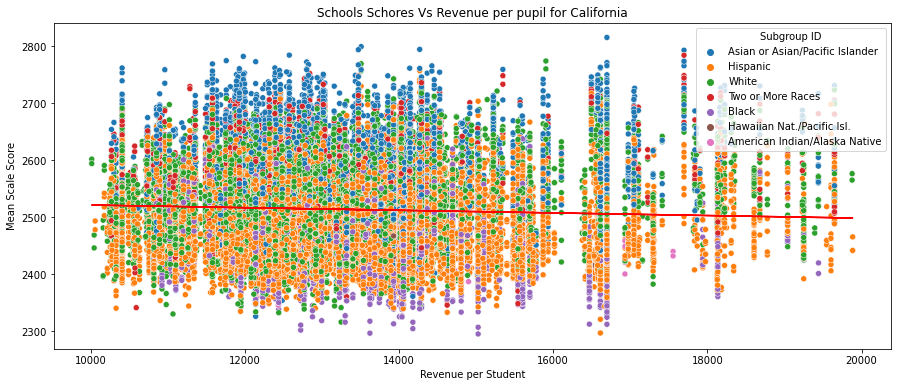

In [20]:
#We are looking at the schools and were are they in the revenue/score comparison
df_revenue=df[df['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'],hue=df_revenue['Subgroup ID'])
yfit = [a + b * xi for xi in df_revenue['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_revenue['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

## Compare scores with Total Enrollment of schools, on the correlation, there seems to be a positive correlation.

best fit line:
y = 2457.4488 + 0.0615x


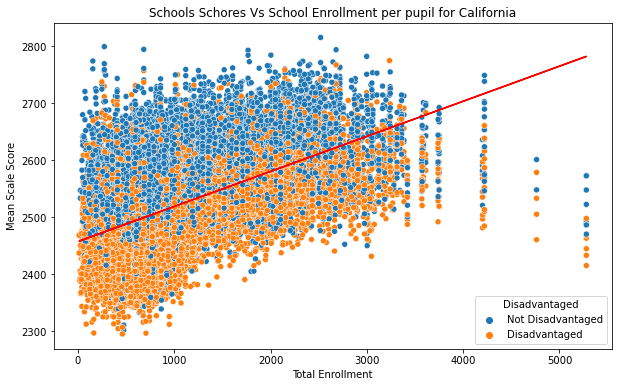

In [21]:
a, b = best_fit(df['Total Enrollment'],df['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df['Total Enrollment'],df['Mean Scale Score'], hue=df['Disadvantaged'])
yfit = [a + b * xi for xi in df['Total Enrollment']]
plt.plot(df['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment per pupil for California')
plt.xlabel('Total Enrollment')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2457.4488 + 0.0615x


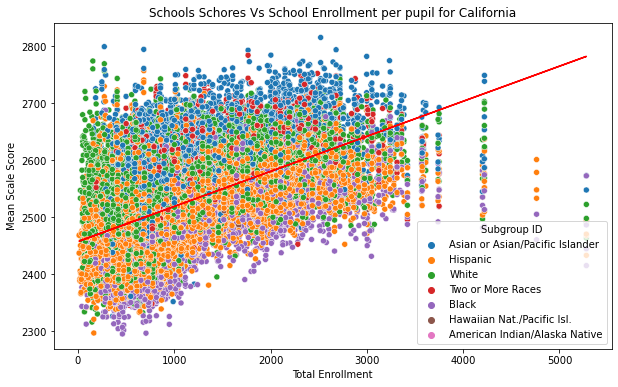

In [22]:
a, b = best_fit(df['Total Enrollment'],df['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df['Total Enrollment'],df['Mean Scale Score'], hue=df['Subgroup ID'])
yfit = [a + b * xi for xi in df['Total Enrollment']]
plt.plot(df['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment per pupil for California')
plt.xlabel('Total Enrollment')
_=plt.ylabel('Mean Scale Score')

## Teacher/Student Ratio also showed a positive correlation, let's look at it

best fit line:
y = 2492.2016 + 0.8881x


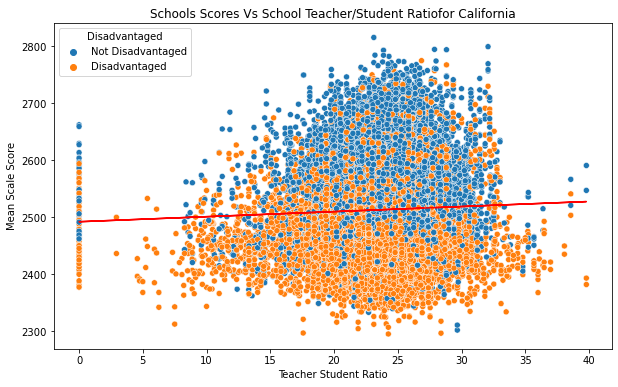

In [23]:
df_ts=df[df['Pupil/Teacher Ratio']<40]
a, b = best_fit(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'], hue=df_ts['Disadvantaged'])
yfit = [a + b * xi for xi in df_ts['Pupil/Teacher Ratio']]
plt.plot(df_ts['Pupil/Teacher Ratio'], yfit, color='red')
plt.title('Schools Scores Vs School Teacher/Student Ratiofor California')
plt.xlabel('Teacher Student Ratio')
_=plt.ylabel('Mean Scale Score')

## It would seem that being Economically Disadvantaged has a high impact on success, we will separate the dataset on Disadvantaged and non Disadvantaged to see the mpact of other factors, like revenue

In [24]:
df_dis= df[df['Disadvantaged']=='Disadvantaged']
df_notDis = df[df['Disadvantaged']=='Not Disadvantaged']

best fit line:
y = 2498.5802 + -0.0013x


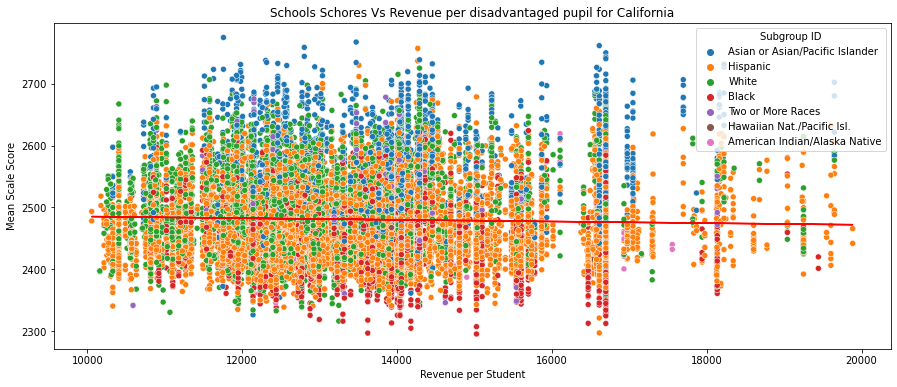

In [25]:
df_dis_r=df_dis[df_dis['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_dis_r['Total Revenue (TOTALREV) per Pupil '],df_dis_r['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_dis_r['Total Revenue (TOTALREV) per Pupil '],df_dis_r['Mean Scale Score'],hue=df_dis_r['Subgroup ID'])
yfit = [a + b * xi for xi in df_dis_r['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_dis_r['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per disadvantaged pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2541.4255 + 0.0006x


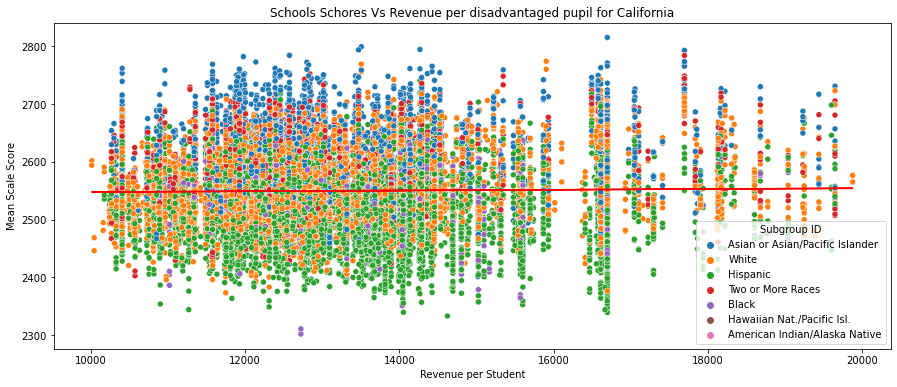

In [26]:
df_ndis_r=df_notDis[df_notDis['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_ndis_r['Total Revenue (TOTALREV) per Pupil '],df_ndis_r['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_ndis_r['Total Revenue (TOTALREV) per Pupil '],df_ndis_r['Mean Scale Score'],hue=df_ndis_r['Subgroup ID'])
yfit = [a + b * xi for xi in df_ndis_r['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_ndis_r['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per disadvantaged pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

## After looking at these separately there seems to be a very flat impact for Disadvantaged students, while for Not Disadvantaged we see a slight positive correlation. Let's see it in numbers

In [27]:
#Correlation for non disadvantaged students
corr_columns = ['School Name', 'District Name', 'District Code_x',
        'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df_notDis.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [28]:
#Correlation for non disadvantaged students
corr_columns = ['School Name', 'District Name', 'District Code_x',
        'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df_dis.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [29]:
#df.columns

## Looking at separate disadvantaged students scores vs school enrollment

best fit line:
y = 2461.7181 + 0.0522x


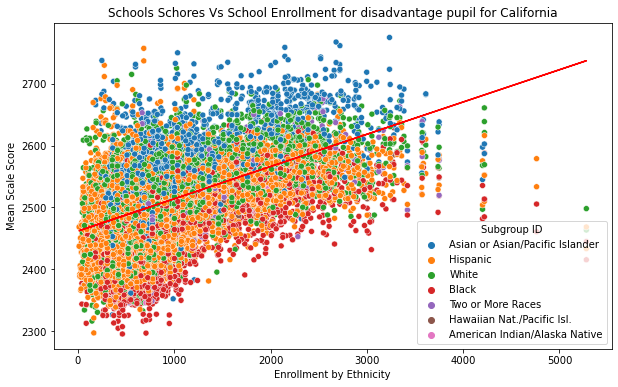

In [30]:
a, b = best_fit(df_dis['Count Enrollment per ethnicity'],df_dis['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_dis['Total Enrollment'],df_dis['Mean Scale Score'], hue=df_dis['Subgroup ID'])
yfit = [a + b * xi for xi in df_dis['Total Enrollment']]
plt.plot(df_dis['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment for disadvantage pupil for California')
plt.xlabel('Enrollment by Ethnicity')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2545.0084 + 0.0143x


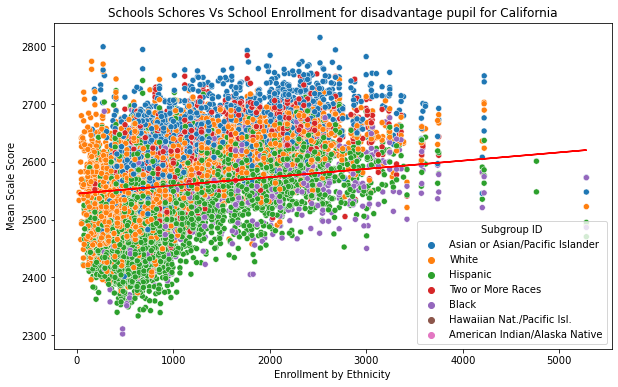

In [31]:
a, b = best_fit(df_notDis['Count Enrollment per ethnicity'],df_notDis['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_notDis['Total Enrollment'],df_notDis['Mean Scale Score'], hue=df_notDis['Subgroup ID'])
yfit = [a + b * xi for xi in df_notDis['Total Enrollment']]
plt.plot(df_notDis['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment for disadvantage pupil for California')
plt.xlabel('Enrollment by Ethnicity')
_=plt.ylabel('Mean Scale Score')

## Visualize the Student/Teacher Ratio against students scores

best fit line:
y = 2474.6561 + 0.2417x


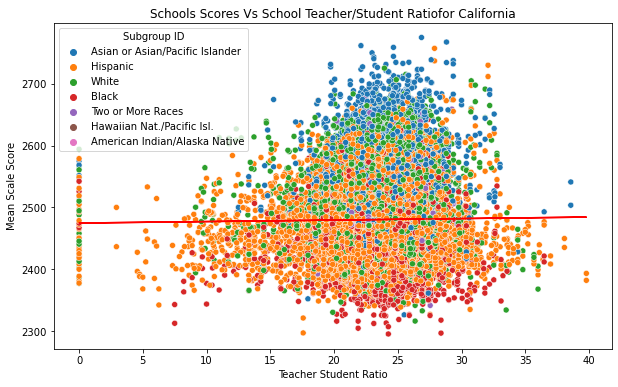

In [32]:
df_ts=df_dis[df_dis['Pupil/Teacher Ratio']<40]
a, b = best_fit(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'], hue=df_ts['Subgroup ID'])
yfit = [a + b * xi for xi in df_ts['Pupil/Teacher Ratio']]
plt.plot(df_ts['Pupil/Teacher Ratio'], yfit, color='red')
plt.title('Schools Scores Vs School Teacher/Student Ratiofor California')
plt.xlabel('Teacher Student Ratio')
_=plt.ylabel('Mean Scale Score')

### It would look to have a slight positive impact the size of the student/teacher ratio, with higher than 35 to be below the bar.

--------------------

## Black and Hispanic students have the lower scores and the impact other factors doesn't seem to impact greatly being disadvantaged. 
## What percentage of students of each ethnicity are Disadvantaged and is revenue and expense of some impact.

In [33]:
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

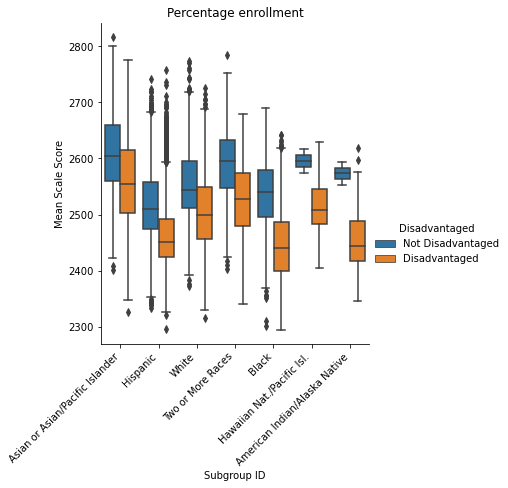

In [34]:
sns.catplot(x="Subgroup ID", y='Mean Scale Score', hue='Disadvantaged',kind="box", data=df_revenue)
plt.xticks(rotation=45, ha='right')
_=plt.title('Percentage enrollment')

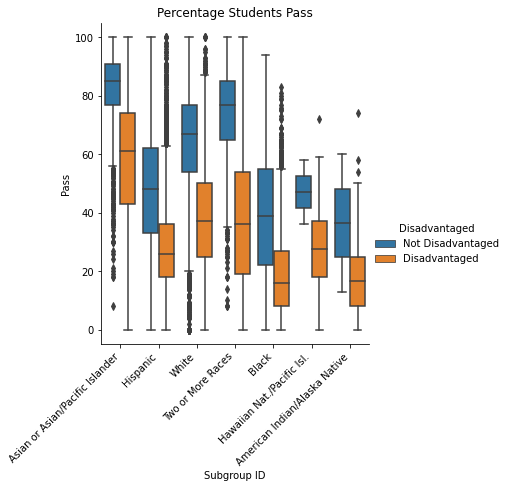

In [35]:
sns.catplot(x="Subgroup ID", y="Pass", hue="Disadvantaged", kind="box", data=df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Percentage Students Pass')

## Looking at the ethnicities with lower scores, and how the revenue per student impacts them, we can see that lower than 12000 per student the scores trend is positive. After 12000 it becomes negative.

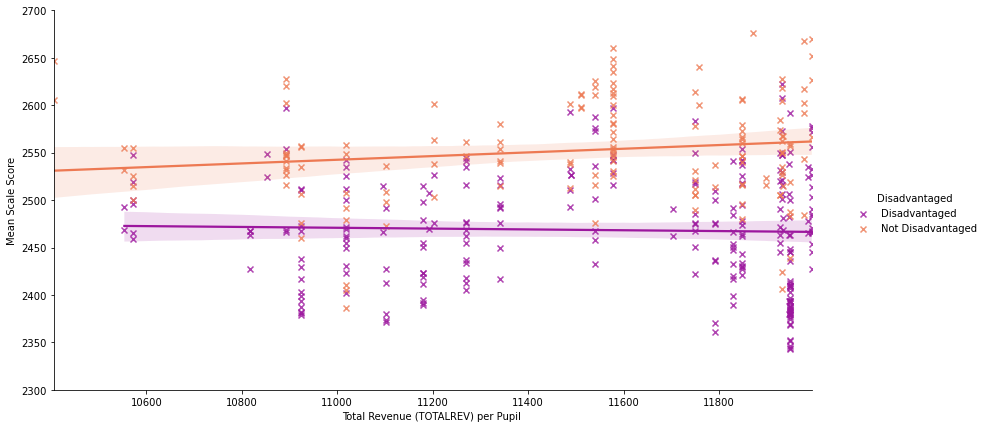

In [36]:
black_df=df[df['Subgroup ID']=='Black']
black_df=black_df[black_df['Total Revenue (TOTALREV) per Pupil ']<=12000]
g = sns.FacetGrid(black_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))
g.add_legend()

In [37]:
df_corr= black_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

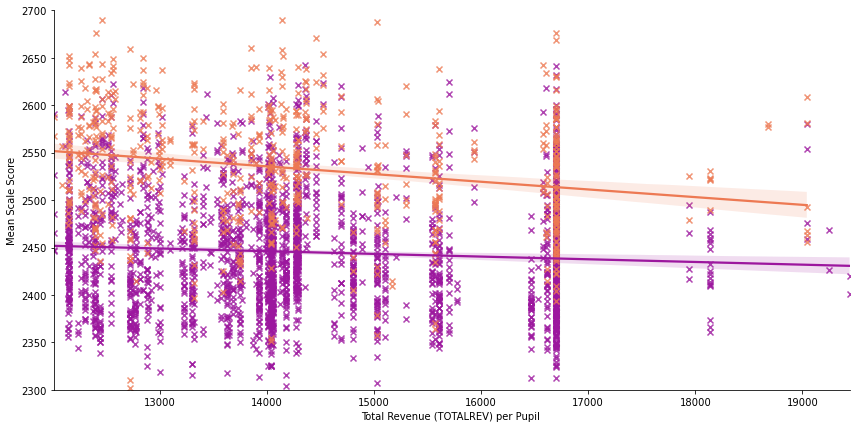

In [38]:
hf_black_df=df[df['Subgroup ID']=='Black']
hf_black_df=hf_black_df[hf_black_df['Total Revenue (TOTALREV) per Pupil ']>12000]
g = sns.FacetGrid(hf_black_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))

In [39]:
df_corr= hf_black_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [40]:
# black_ndis_df=black_df[black_df['Disadvantaged']=='Not Disadvantaged']
# a, b = best_fit(black_ndis_df['Total Revenue (TOTALREV) per Pupil '],black_ndis_df['Mean Scale Score'])
# sns.scatterplot(black_ndis_df['Total Revenue (TOTALREV) per Pupil '],black_ndis_df['Mean Scale Score'])
# yfit = [a + b * xi for xi in black_ndis_df['Total Revenue (TOTALREV) per Pupil ']]
# plt.plot(black_ndis_df['Total Revenue (TOTALREV) per Pupil '], yfit, color='red')
# plt.title('Scores of Black non disadvantaged students vs Revenue per Student')
# plt.xlabel('Revenue per Student')
# _=plt.ylabel('Mean Scale Score')

In [41]:
# black_df=df[df['Subgroup ID']=='Black']
# black_ndis_df=black_df[black_df['Disadvantaged']=='Not Disadvantaged']
# a, b = best_fit(black_ndis_df['Count Enrollment per ethnicity'],black_ndis_df['Mean Scale Score'])
# sns.scatterplot(black_ndis_df['Count Enrollment per ethnicity'],black_ndis_df['Mean Scale Score'])
# yfit = [a + b * xi for xi in black_ndis_df['Count Enrollment per ethnicity']]
# plt.plot(black_ndis_df['Count Enrollment per ethnicity'], yfit, color='red')
# plt.title('Scores of Black non disadvantaged students vs Student Enrollment')
# plt.xlabel('Revenue per Student')
# _=plt.ylabel('Mean Scale Score')

In [42]:
#df.columns

### Let's look at not disadvantaged Hispanic Students performance.

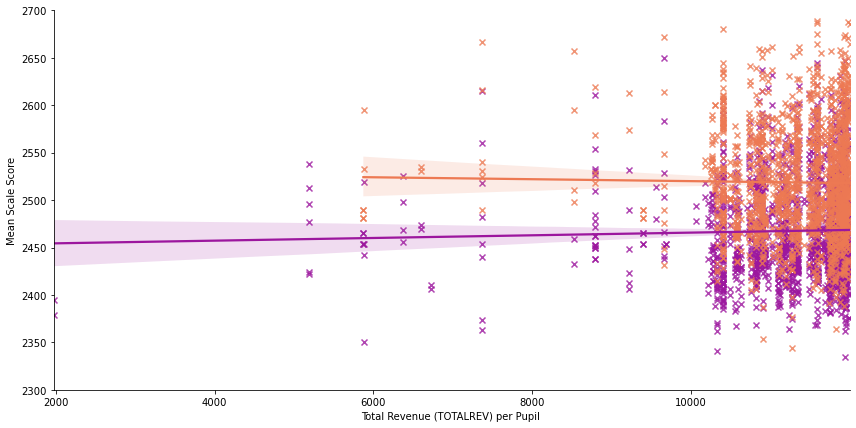

In [43]:
hispanic_df=df[df['Subgroup ID']=='Hispanic']
hispanic_df=hispanic_df[hispanic_df['Total Revenue (TOTALREV) per Pupil ']<=12000]
g = sns.FacetGrid(hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))


In [44]:
df_corr= hispanic_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

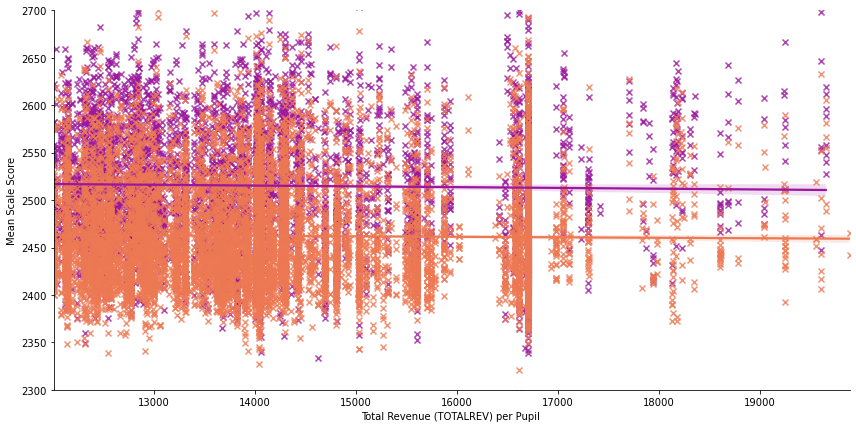

In [45]:
hf_hispanic_df=df[df['Subgroup ID']=='Hispanic']
hf_hispanic_df=hf_hispanic_df[hf_hispanic_df['Total Revenue (TOTALREV) per Pupil ']>12000]
g = sns.FacetGrid(hf_hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))

In [46]:
df_corr= hf_hispanic_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

## Let us understand how is that money spent.

In [47]:
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

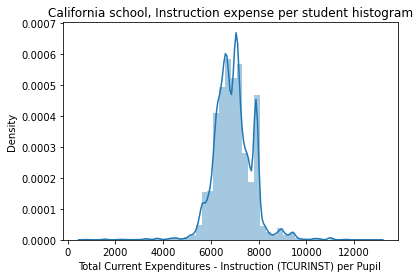

In [48]:
plt.figure(figsize=(6,4))
sns.distplot(df['Total Current Expenditures - Instruction (TCURINST) per Pupil '])
plt.title('California school, Instruction expense per student histogram')
plt.show()

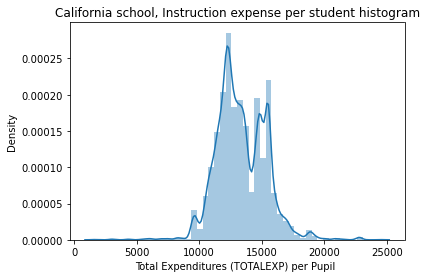

In [49]:
plt.figure(figsize=(6,4))
sns.distplot(df['Total Expenditures (TOTALEXP) per Pupil '])
plt.title('California school, Instruction expense per student histogram')
plt.show()

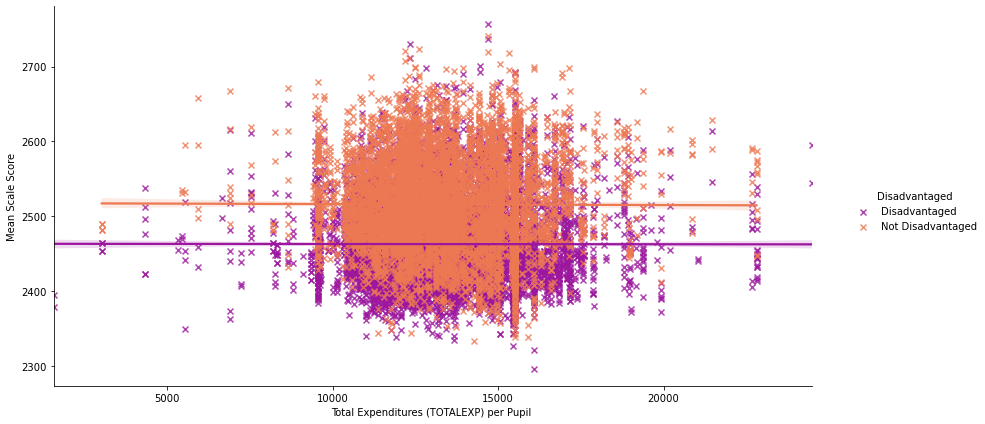

In [50]:
hispanic_df=df[df['Subgroup ID']=='Hispanic']
#hispanic_df=hispanic_df[hispanic_df['Total Expenditures (TOTALEXP) per Pupil ']>10000]
g = sns.FacetGrid(hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Expenditures (TOTALEXP) per Pupil ', 'Mean Scale Score',marker="x")
#_=g.set(#xlim=(10000, 20000), 
 #   ylim=(2300, 2700))
g.add_legend()

In [51]:

hispanic_df=hispanic_df[hispanic_df['Disadvantaged']=='Disadvantaged']
df_corr= hispanic_df.drop(columns= corr_cols)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

NameError: name 'corr_cols' is not defined

In [ ]:
hispanic_df=df[df['Subgroup ID']=='Hispanic']
hispanic_df=hispanic_df[hispanic_df['Total Current Expenditures - Instruction (TCURINST) per Pupil ']>10000]
g = sns.FacetGrid(hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Current Expenditures - Instruction (TCURINST) per Pupil ', 'Mean Scale Score',marker="x")
#_=g.set(#xlim=(10000, 20000), 
 #   ylim=(2300, 2700))
g.add_legend()

In [ ]:
corr_cols=['School Name', 'District Name', 'District Code_x',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ', 'Subgroup ID',
       'Count Enrollment per ethnicity', 'County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code',
       'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= hispanic_df.drop(columns= corr_cols)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [ ]:
#top_revenue = df[df['Total Revenue (TOTALREV) per Pupil ']>12000]

In [ ]:
cut_labels = ['Less12K','More12K']
cut_bins = [0, 12000,50000]
df['revenuePstudent'] = pd.cut(df['Total Revenue (TOTALREV) per Pupil '], bins=cut_bins, labels=cut_labels)

In [ ]:
#titanic.groupby(['sex','survived']).agg({'fare':'count','age':'mean'}).reset_index()

enrollment=pd.pivot_table(df, index=['Disadvantaged','revenuePstudent','Subgroup ID'], values=['Count Enrollment per ethnicity'], aggfunc=np.sum).reset_index()
enrollment

In [ ]:
g = sns.FacetGrid(enrollment,hue='Disadvantaged', row= 'revenuePstudent',margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(
sns.barplot,'Subgroup ID','Count Enrollment per ethnicity')
#g.set(xlim=(100000,4000000))
_=g.add_legend()

In [ ]:
cut_labels = ['Less12K','More12K']
cut_bins = [0, 12000,50000]
df['expensePstudent'] = pd.cut(df['Total Expenditures (TOTALEXP) per Pupil '], bins=cut_bins, labels=cut_labels)
pd.pivot_table(top_revenue, index=['District Name'],values=['Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil '], aggfunc=np.sum)

## Conclusions (as of now):
1. 

## Observations:
1. 

## NEXT STEPS:
1.